In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [2]:
data=[[3,1.5,1],
      [2,1,0],
      [4,1.5,1],
      [3,1,0],
      [3.5,0.5,1],
      [2,0.5,0],
      [5.5,1,1],
      [1,1,0]]
mystery_flower=[4.5,1]

In [3]:
def sigmoid(X):
    return 1/(1+np.exp(-X))
def sigmoid_P(x):
    return sigmoid (x)*(1-sigmoid(x))

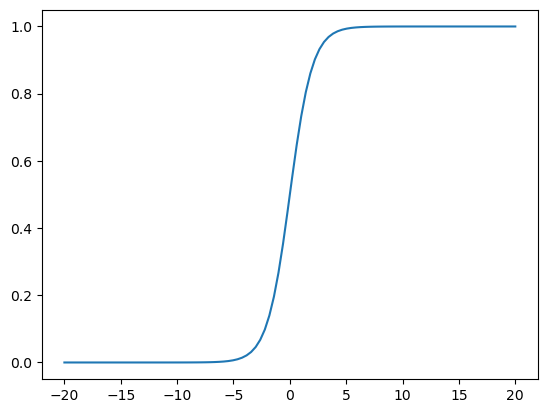

In [4]:
T=np.linspace(-20,20,100)
Y=sigmoid(T)
plt.plot(T,Y)

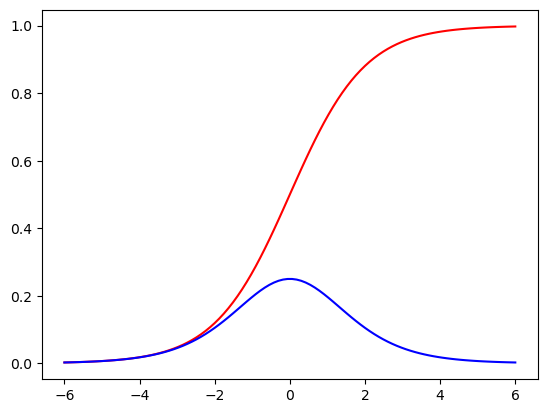

In [5]:
T=np.linspace(-6,6,100)
plt.plot(T,sigmoid(T),c='r')
plt.plot(T,sigmoid_P(T),c='b')

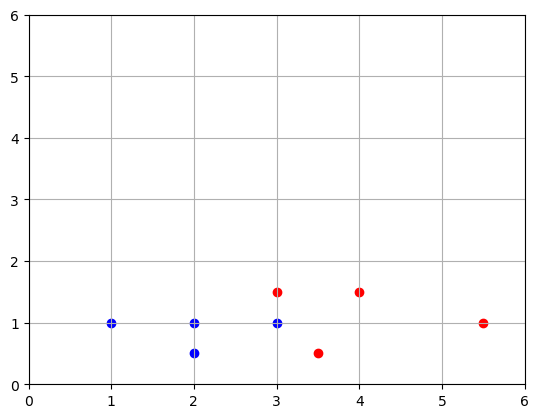

In [7]:
plt.axis([0,6,0,6])
plt.grid()
for i in range(len(data)):
    point=data[i]
    color="r"
    if point[2]==0:
        color="b"
    plt.scatter(point[0],point[1], c=color)

In [33]:
learning_rate=0.3
costs=[]
w1=np.random.randn()
w2=np.random.randn()
b=np.random.randn()

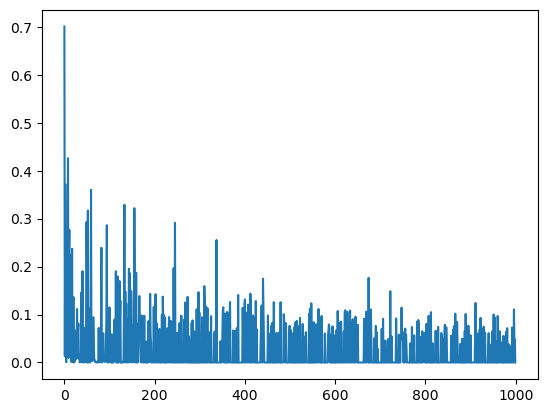

In [34]:
for i in range(100000):
      ri=np.random.randint(len(data))
      point=data[ri]
      z=point[0]*w1+point[1]*w2+b
      pred=sigmoid(z)
      target=point[2]
      cost=np.square(pred-target)
      dcost_pred=2*(pred-target)
      dpred_dz=sigmoid_P(z)*(1-sigmoid(z))
        
      dz_dw1=point[0]
      dz_dw2=point[1]
      dz_db=1
    
      dcost_dz=dcost_pred*dpred_dz
        
      dcost_dw1=dcost_dz*dz_dw1
      dcost_dw2=dcost_dz*dz_dw2
      dcost_db=dcost_dz*dz_db
    
      w1=w1-learning_rate*dcost_dw1
      w2=w2-learning_rate*dcost_dw2
      b=b-learning_rate*dcost_db
        
      if i % 100==0:
          cost_sum=0
          for j in range(len(data)):
              point=data[ri]
                
              z=point[0]*w1+point[1]*w2+b
              pred=sigmoid(z)
                
              target=point[2]
              cost_sum +=np.square(pred-target)
                
          costs.append(cost_sum/len(data))
        
plt.plot(costs)

In [35]:
w1

8.283797643287697

In [36]:
w2

3.929068228152046

In [37]:
b

-30.185754116999462

In [38]:
for i in range(len(data)):
    point=data[i]
    print(point)
    z=point[0]*w1+point[1]*w2+b
    pred=sigmoid(z)
    print("pred:{}".format(pred))

[3, 1.5, 1]
pred:0.6362769400379347
[2, 1, 0]
pred:6.195188292545866e-05
[4, 1.5, 1]
pred:0.9998556375159897
[3, 1, 0]
pred:0.19697754199260903
[3.5, 0.5, 1]
pred:0.683968884068614
[2, 0.5, 0]
pred:8.687430007332145e-06
[5.5, 1, 1]
pred:0.9999999958667471
[1, 1, 0]
pred:1.564853927764253e-08


In [39]:
z=mystery_flower[0]*w1+mystery_flower[1]*w2+b
pred=sigmoid(z)
pred

0.9999836358872892

In [40]:
def which_flower(length, width):
    z=length*w1+width*w2+b
    print(z)
    pred=sigmoid(z)
    if pred<0.5:
        print("blue")
    else:
        print("red")

In [41]:
which_flower(0.5,1)

-22.114787067203565
blue


In [42]:
which_flower(4.5,1)

11.020403505947222
red


In [43]:
import os

In [44]:
from gtts import gTTS
tts=gTTS(text='紅色', lang='zh-TW')
tts.save('red.mp3')

tts=gTTS(text='藍色', lang='zh-TW')
tts.save('blue.mp3')

In [45]:
def which_flower(length, width):
    z=length*w1+width*w2+b
    print(z)
    pred=sigmoid(z)
    
    if pred < 0.5:
        os.system("blue.mps")
    else:
        os.system("red.mps")

In [46]:
which_flower(4.5,1)

11.020403505947222


In [47]:
which_flower(0.4,2)

-19.01409860338029
